#One Week Project Data Analis
## import data

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
! wget -O titanic.csv https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2024-02-18 14:19:15--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2024-02-18 14:19:16 (4.93 MB/s) - ‘titanic.csv’ saved [60302/60302]



## load data

In [3]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


terdapat 12 kolom dengan 7 continous variables dan 5 categorical variables
terdapat 891 baris, dengan beberapa kolom yang mempunyai nilai null, bisa dilihat dari total barisnya. kolom tersebut adalah Age, Cabin, and Embarked

<Axes: >

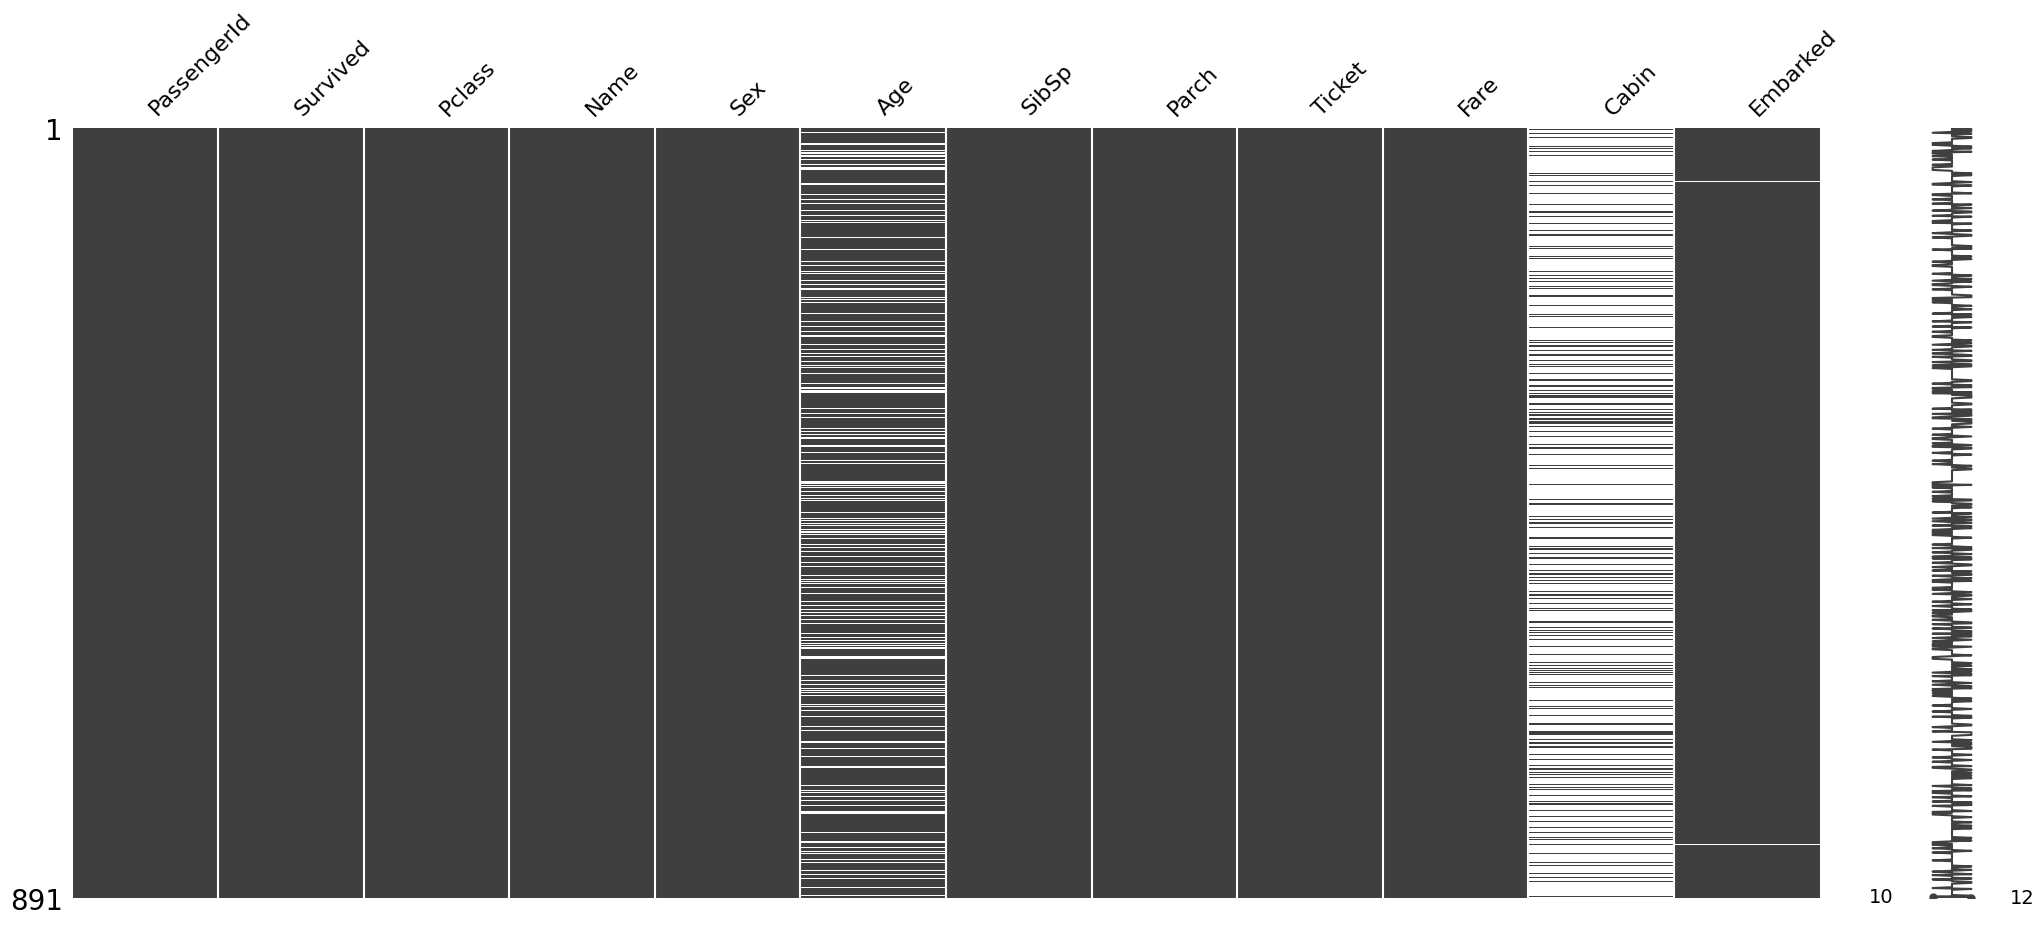

In [5]:
msno.matrix(df)

setelah dicek menggukanan missingno terlihat beberapa kolom terdapat value yang null, yaitu kolom : age, cabin dan Embarked

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


diatas merupakan describe dari dataframe titanic

### Handle Missing Value on Categorical Feature

untuk missing value yang merupakan Categorical Feature kita bisa menggunakan empty string.

Feature yang akan kita isi dengan empty string adalah cabin dan embarked


In [7]:
# copy erlebih dahulu sebelum diubah data nya

df_missing = df.copy()

In [8]:
#cek value yang missing feature Cabin

df_missing[df_missing["Cabin"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [9]:
#mengisi value yang null dengan empty string di feature Cabin

df_missing["Cabin"] = df_missing["Cabin"].fillna("")
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#cek value yang missing feature Embarked

df_missing[df_missing["Embarked"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
#mengisi value yang null dengan empty string di feature Embarked

df_missing["Embarked"] = df_missing["Embarked"].fillna("")
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Handle Missing Value on Continous  Feature

untuk missing value yang merupakan Continous  Feature kita bisa menggunakan nilai median. karena antara mean dan median memiliki angka yang hampir sama

Feature yang akan kita isi dengan nilai median adalah age.

In [12]:
#cek value yang missing feature Cabin

df_missing[df_missing["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,,Q


In [13]:
#cek median
median_age = df_missing["Age"].median()

median_age

28.0

In [14]:
#mengisi value yang null dengan median di feature Embarked

df_missing["Age"] = df_missing["Age"].fillna(median_age)
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


setealh kita cek menggunakan df.info terlihat sudah tidak ada data yang null

In [15]:
# setelah data nya oke
# kita mengcopy lagi ke dataframe utama

df = df_missing.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cek Value on Categorical Feature

Let's detect value outliers

In [17]:
print (f"unique data in PassengerId : {df['PassengerId'].nunique()}")
print (f"unique data in Survived : {df['Survived'].nunique()}")
print (f"unique data in Pclass : {df['Pclass'].nunique()}")
print (f"unique data in Age : {df['Age'].nunique()}")
print (f"unique data in SibSp : {df['SibSp'].nunique()}")
print (f"unique data in Parch : {df['Parch'].nunique()}")
print (f"unique data in Fare : {df['Fare'].nunique()}")

unique data in PassengerId : 891
unique data in Survived : 2
unique data in Pclass : 3
unique data in Age : 88
unique data in SibSp : 7
unique data in Parch : 7
unique data in Fare : 248


kalau dilihat dari unik diatas khusus PassengerId memang unik karena dibuat untuk id jadi jumlah data yang uniq sama dengan jumlah row nya

setelah itu kita akan cek nilai min dan max nya

In [18]:
print (f"data in Survived : min {df['Survived'].min()} and max {df['Survived'].max()}")
print (f"data in Pclass : min {df['Pclass'].min()} and max {df['Pclass'].max()}")
print (f"data in Age : min {df['Age'].min()} and max {df['Age'].max()}")
print (f"data in SibSp  : min {df['SibSp'].min()} and max {df['SibSp'].max()}")
print (f"data in Parch  : min {df['Parch'].min()} and max {df['Parch'].max()}")
print (f"data in Fare  : min {df['Fare'].min()} and max {df['Fare'].max()}")

data in Survived : min 0 and max 1
data in Pclass : min 1 and max 3
data in Age : min 0.42 and max 80.0
data in SibSp  : min 0 and max 8
data in Parch  : min 0 and max 6
data in Fare  : min 0.0 and max 512.3292


kalau dilihat dari data diatas data yang memiliki range terbesar ada di Age dan Fare.

dari feature Age dan Fare kita akan cari outlier nya

## Detect and Visualize Outlier Age

Let's detect outliers by visualize it

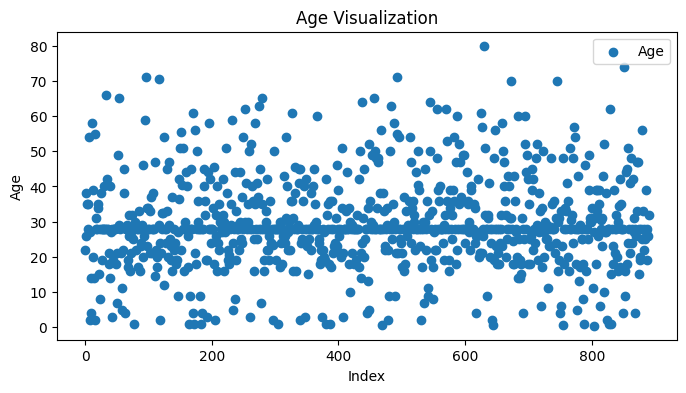

In [19]:
# Visualize the dataset

plt.figure(figsize=(8, 4))
plt.scatter(df.index, df['Age'], label='Age')
plt.xlabel('Index')
plt.ylabel('Age')
plt.title('Age Visualization')
plt.legend()
plt.show()

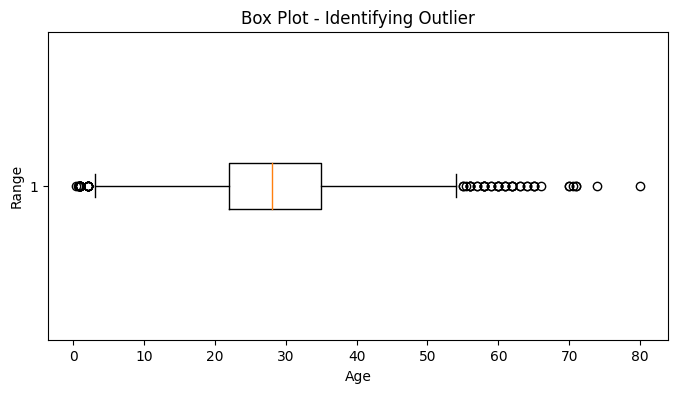

In [20]:
# Visualize Outlier with Boxplot

plt.figure(figsize=(8, 4))
plt.boxplot(df['Age'], vert=False)
plt.title('Box Plot - Identifying Outlier')
plt.ylabel('Range')
plt.xlabel('Age')
plt.show()

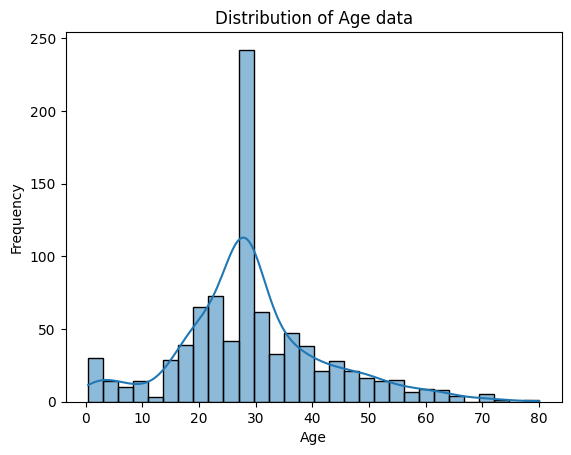

In [21]:
sns.histplot(df, x="Age", kde=True)
plt.title("Distribution of Age data")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Detect and Visualize Outlier Fare

Let's detect outliers by visualize it

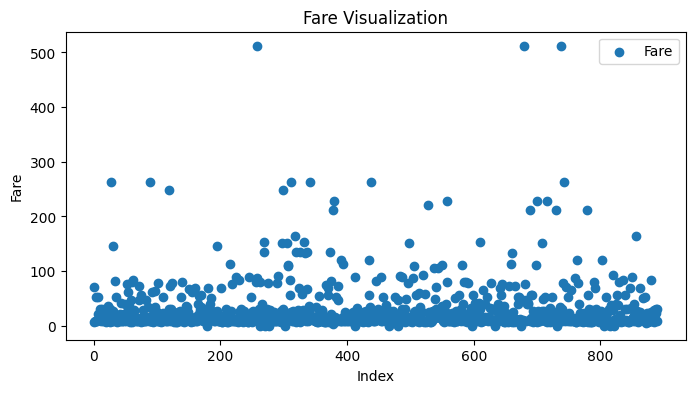

In [22]:
# Visualize the dataset

plt.figure(figsize=(8, 4))
plt.scatter(df.index, df['Fare'], label='Fare')
plt.xlabel('Index')
plt.ylabel('Fare')
plt.title('Fare Visualization')
plt.legend()
plt.show()

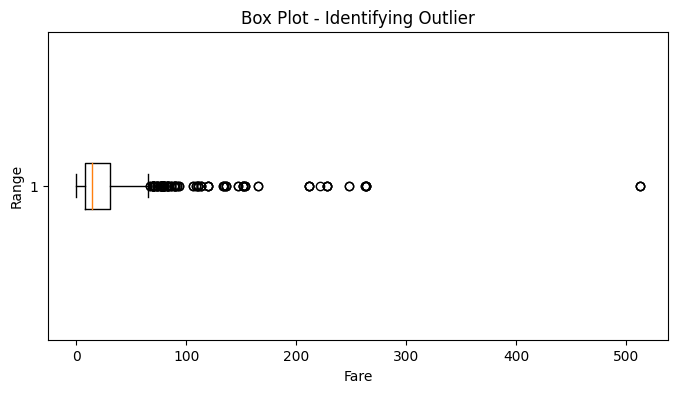

In [23]:
# Visualize Outlier with Boxplot

plt.figure(figsize=(8, 4))
plt.boxplot(df['Fare'], vert=False)
plt.title('Box Plot - Identifying Outlier')
plt.ylabel('Range')
plt.xlabel('Fare')
plt.show()

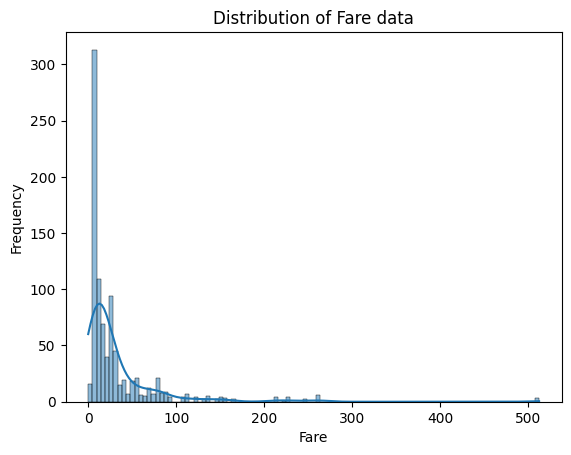

In [24]:
sns.histplot(df, x="Fare", kde=True)
plt.title("Distribution of Fare data")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

## Handle Outlier - Winsorizing
Replacing extreme values with capped value (e.g. lower and upper bound)

In [25]:
# dicopy terlebih dahulu

df_winsorize = df.copy()

### Winsorizing Age

In [26]:
# getting IQR, upper, and lower bound
q1_age = df_winsorize["Age"].quantile(0.25)
q3_age = df_winsorize["Age"].quantile(0.75)
IQR_age = q3_age - q1_age

lower_bound_age = q1_age - 1.5 * IQR_age
upper_bound_age = q3_age + 1.5 * IQR_age

In [27]:
outliers_age = df_winsorize[(df_winsorize["Age"] < lower_bound_age) | (df_winsorize["Age"] > upper_bound_age)]

In [28]:
df_winsorize["Age"] = np.clip(df_winsorize["Age"], lower_bound_age, upper_bound_age)

# check outliers again
df_winsorize[(df_winsorize["Age"] < lower_bound_age) | (df_winsorize["Age"] > upper_bound_age)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [29]:
# get winsorized data
winsorized_age = df_winsorize[df_winsorize.index.isin(list(outliers_age.index))]
winsorized_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.5,3,1,349909,21.075,,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,54.5,0,0,113783,26.550,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,54.5,0,0,248706,16.000,,S
16,17,0,3,"Rice, Master. Eugene",male,2.5,4,1,382652,29.125,,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,54.5,0,0,C.A. 24579,10.500,,S


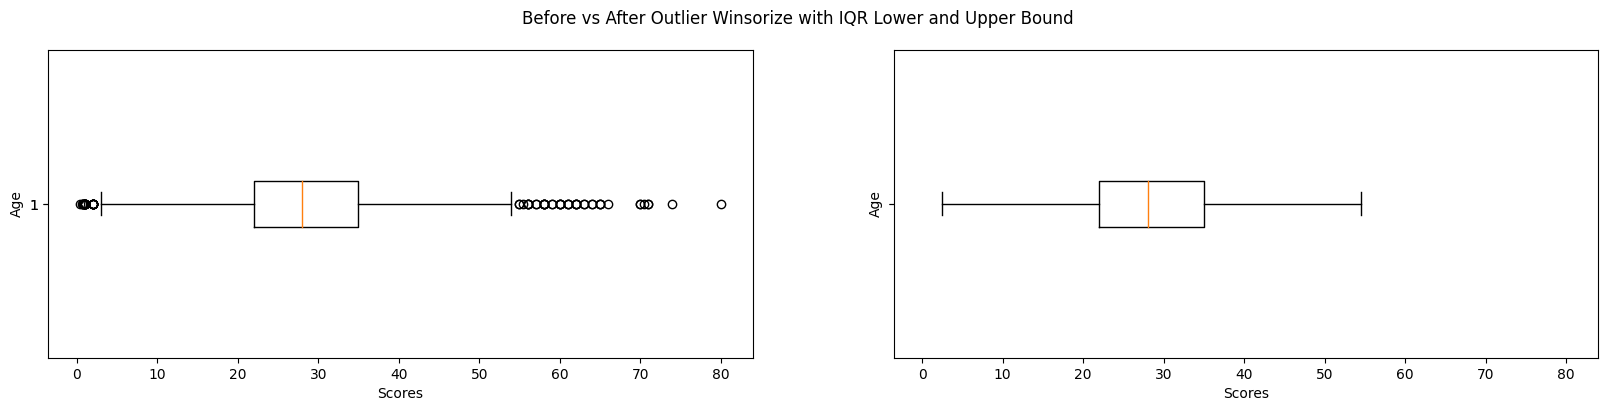

In [30]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20, 4))
ax[0].boxplot(df['Age'], vert=False)
ax[0].set_xlabel("Scores")
ax[0].set_ylabel("Age")
ax[1].boxplot(df_winsorize['Age'], vert=False)
ax[1].set_xlabel("Scores")
ax[1].set_ylabel("Age")
fig.suptitle("Before vs After Outlier Winsorize with IQR Lower and Upper Bound")
plt.show()

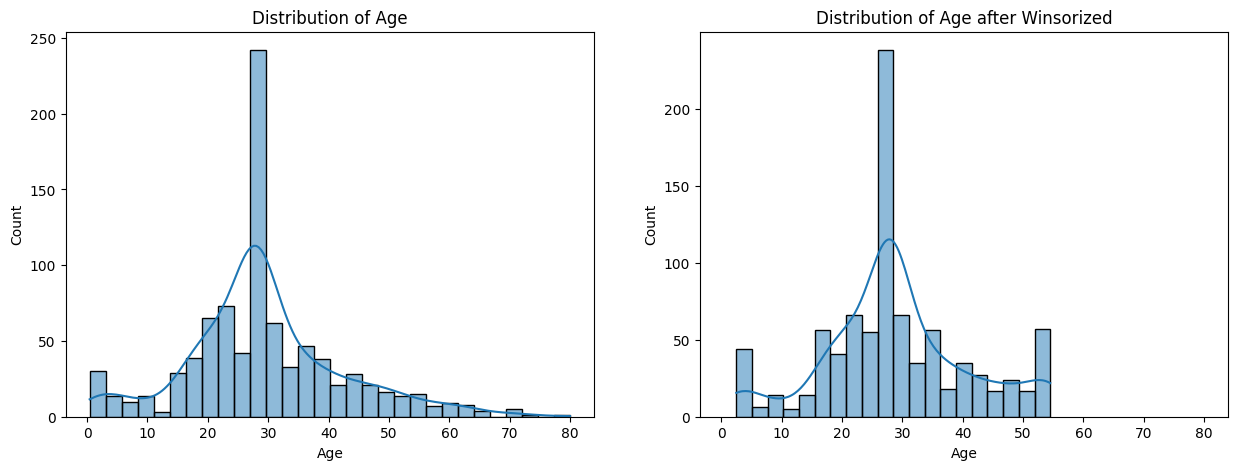

In [31]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15, 5))

sns.histplot(df, x="Age", ax=ax[0], kde=True)
ax[0].set_title("Distribution of Age")

sns.histplot(df_winsorize, x="Age", ax=ax[1], kde=True)
ax[1].set_title("Distribution of Age after Winsorized")

plt.show()

### Winsorizing Fare

In [32]:
# getting IQR, upper, and lower bound
q1_fare = df_winsorize["Fare"].quantile(0.25)
q3_fare = df_winsorize["Fare"].quantile(0.75)
IQR_fare = q3_fare - q1_fare

lower_bound_age = q1_fare - 1.5 * IQR_fare
upper_bound_age = q3_fare + 1.5 * IQR_fare

In [33]:
outliers_fare = df_winsorize[(df_winsorize["Fare"] < lower_bound_age) | (df_winsorize["Fare"] > upper_bound_age)]

In [34]:
df_winsorize["Fare"] = np.clip(df_winsorize["Fare"], lower_bound_age, upper_bound_age)

# check outliers again
df_winsorize[(df_winsorize["Fare"] < lower_bound_age) | (df_winsorize["Fare"] > upper_bound_age)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [35]:
# get winsorized data
winsorized_fare = df_winsorize[df_winsorize.index.isin(list(outliers_fare.index))]
winsorized_fare.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,65.6344,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,65.6344,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,65.6344,,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,65.6344,D33,C


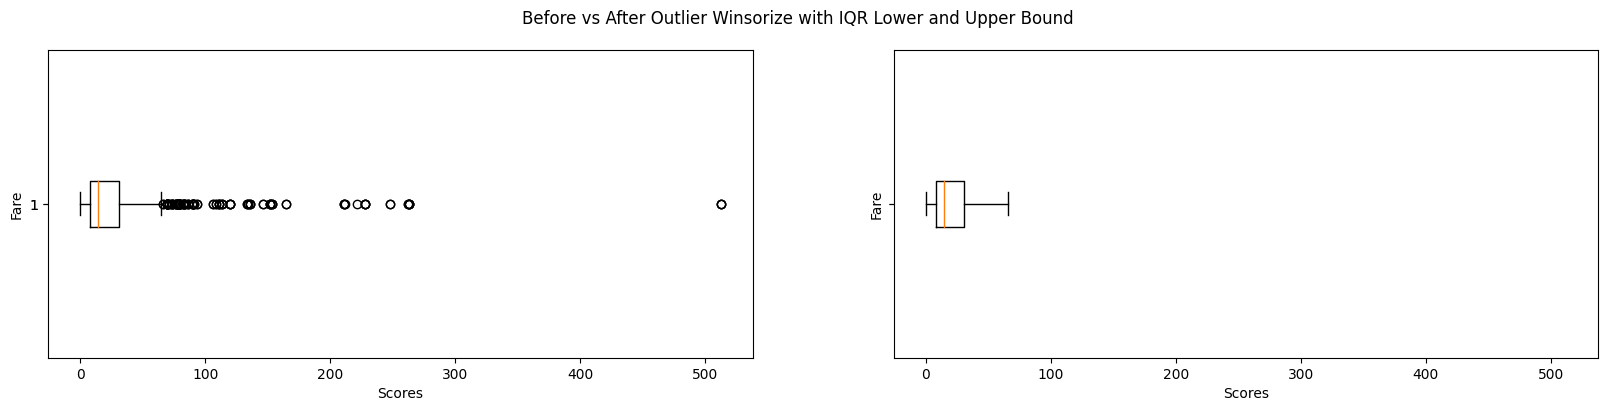

In [36]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20, 4))
ax[0].boxplot(df['Fare'], vert=False)
ax[0].set_xlabel("Scores")
ax[0].set_ylabel("Fare")
ax[1].boxplot(df_winsorize['Fare'], vert=False)
ax[1].set_xlabel("Scores")
ax[1].set_ylabel("Fare")
fig.suptitle("Before vs After Outlier Winsorize with IQR Lower and Upper Bound")
plt.show()

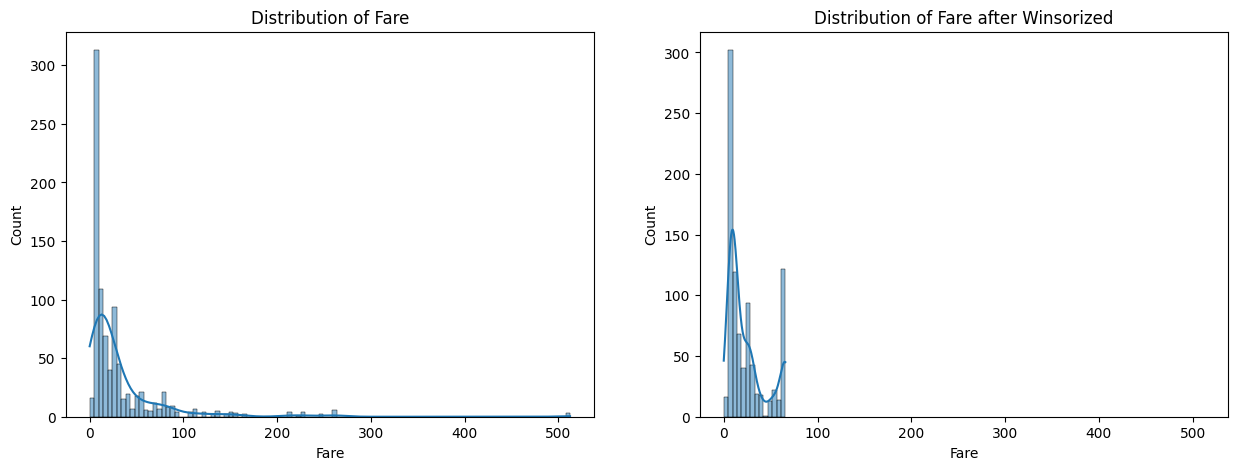

In [37]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15, 5))

sns.histplot(df, x="Fare", ax=ax[0], kde=True)
ax[0].set_title("Distribution of Fare")

sns.histplot(df_winsorize, x="Fare", ax=ax[1], kde=True)
ax[1].set_title("Distribution of Fare after Winsorized")

plt.show()

## Normalization methode z-score

after Handle outlier, data harus di normalisasi agar bisa di korelasikan

ada 3 feature yang akan di normalisasikan Survived, Age, and Fare

In [38]:
# copy data from winsorizing

df = df_winsorize.copy()

In [39]:
#copy from df

df_norm = df.copy()

df_norm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S


In [40]:
#merubah Sex menjadi bilangan integer

def sex_to_int(sex):
    if sex == "male":
        return 1
    elif sex == "female":
        return 0
    else:
        return -1

In [41]:
#memasukan ke feature baru sex_int

df_norm["sex_int"] = df_norm["Sex"].apply(sex_to_int)
print (f"data in sex_int  : min {df_norm['sex_int'].min()} and max {df_norm['sex_int'].max()}")

data in sex_int  : min 0 and max 1


In [42]:
df_norm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_int
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,1


In [43]:
#membuat feature baru yang sudah di normalisasi

df_norm["Survived_norm"] = (df_norm["Survived"] - df_norm["Survived"].mean()) / df_norm["Survived"].std()
df_norm["Age_norm"] = (df_norm["Age"] - df_norm["Age"].mean()) / df_norm["Age"].std()
df_norm["Fare_norm"] = (df_norm["Fare"] - df_norm["Fare"].mean()) / df_norm["Fare"].std()
df_norm["sex_int"] = (df_norm["sex_int"] - df_norm["sex_int"].mean()) / df_norm["sex_int"].std()

In [44]:
df_norm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_int,Survived_norm,Age_norm,Fare_norm
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,0.737281,-0.788829,-0.583105,-0.820092
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C,-1.354813,1.266279,0.742268,2.030483
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,-1.354813,1.266279,-0.251761,-0.787135
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-1.354813,1.266279,0.493761,1.418500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,0.737281,-0.788829,0.493761,-0.781032


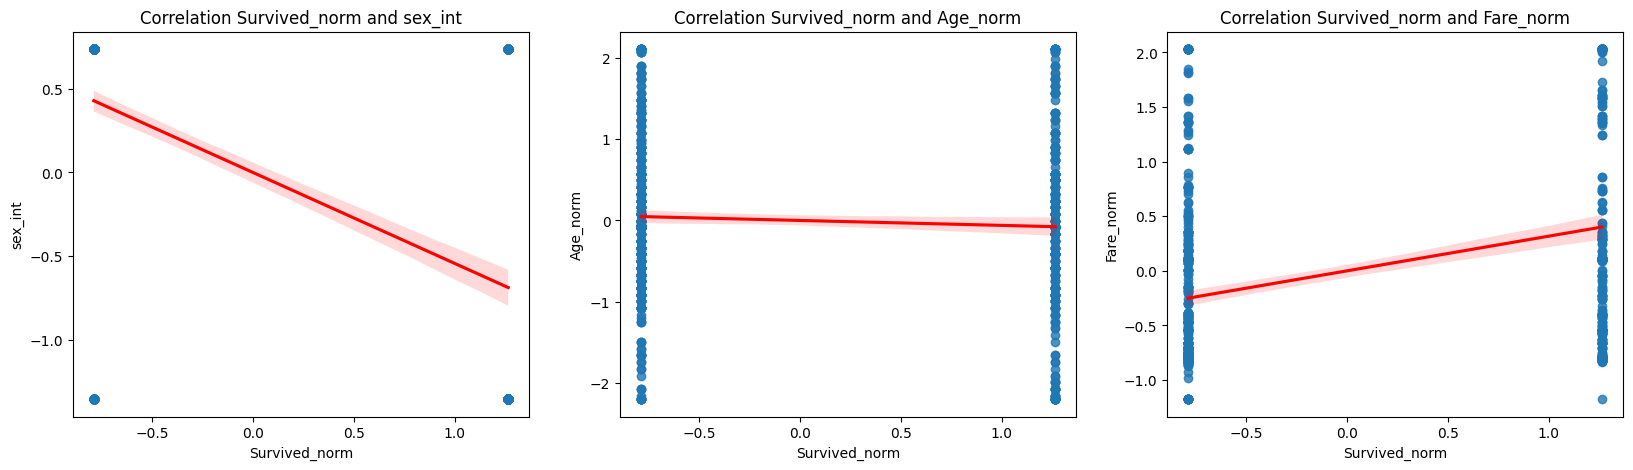

In [45]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(20, 5))

sns.regplot(df_norm, x="Survived_norm", y="sex_int", line_kws={"color": "red"}, ax=ax[0])
ax[0].set_title("Correlation Survived_norm and sex_int")

sns.regplot(df_norm, x="Survived_norm", y="Age_norm", line_kws={"color": "red"}, ax=ax[1])
ax[1].set_title("Correlation Survived_norm and Age_norm")

sns.regplot(df_norm, x="Survived_norm", y="Fare_norm", line_kws={"color": "red"}, ax=ax[2])
ax[2].set_title("Correlation Survived_norm and Fare_norm")

plt.show()

## corelation

In [46]:
df =  df_norm.copy()

In [47]:
df_corr = df[["sex_int", "Age_norm", "Fare_norm", "Survived_norm"]].corr()
df_corr

,sex_int,Age_norm,Fare_norm,Survived_norm
sex_int,1.000000,0.074740,-0.234969,-0.543351
Age_norm,0.074740,1.000000,0.144544,-0.060622
Fare_norm,-0.234969,0.144544,1.000000,0.317430
Survived_norm,-0.543351,-0.060622,0.317430,1.000000


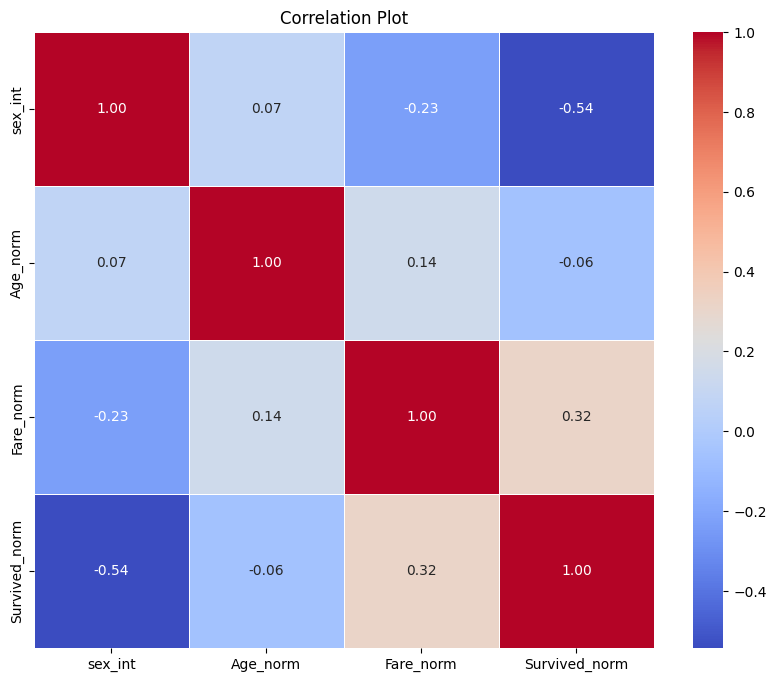

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Plot")
plt.show()

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_int,Survived_norm,Age_norm,Fare_norm
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,0.737281,-0.788829,-0.583105,-0.820092
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C,-1.354813,1.266279,0.742268,2.030483
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,-1.354813,1.266279,-0.251761,-0.787135
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-1.354813,1.266279,0.493761,1.418500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,0.737281,-0.788829,0.493761,-0.781032


In [50]:
#copy df

df_visual = df.copy()

In [51]:
#merubah Survived menjadi Categorical

def survived_to_ctr(survived):
    if survived == 1:
        return "Survived"
    elif survived == 0:
        return "Not Survived"
    else:
        return "Unknown"

In [52]:
#memasukan ke feature baru sex_int

df_visual["survived_to_ctr"] = df_visual["Survived"].apply(survived_to_ctr)
print(df_visual["survived_to_ctr"].unique())

['Not Survived' 'Survived']


In [53]:
df_visual.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_int,Survived_norm,Age_norm,Fare_norm,survived_to_ctr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,0.737281,-0.788829,-0.583105,-0.820092,Not Survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C,-1.354813,1.266279,0.742268,2.030483,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,-1.354813,1.266279,-0.251761,-0.787135,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,-1.354813,1.266279,0.493761,1.418500,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,0.737281,-0.788829,0.493761,-0.781032,Not Survived


<ipython-input-56-26923c432d88>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_visual, x='Survived', y='Sex', inner='box', palette='Dark2')


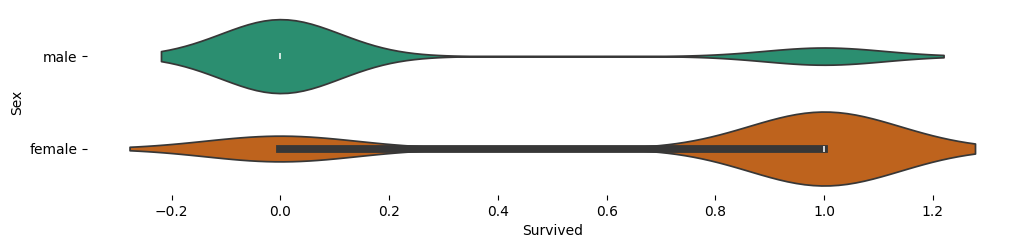

In [56]:
# @title Sex vs Survived

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_visual['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_visual, x='Survived', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

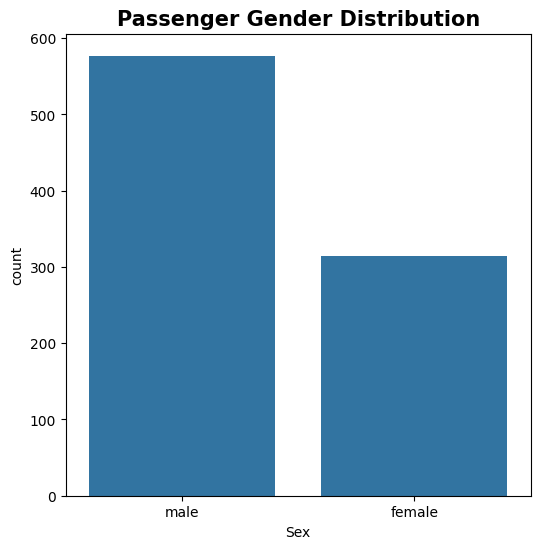

total male Passenger: 577
total female Passenger: 314


In [54]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Sex')
plt.title('Passenger Gender Distribution', fontsize=15, fontweight='bold')
plt.show()

print('total male Passenger: {}'.format(len(df[df.Sex == 'male'])))
print('total female Passenger: {}'.format(len(df[df.Sex == 'female'])))

## Relation Between Variables

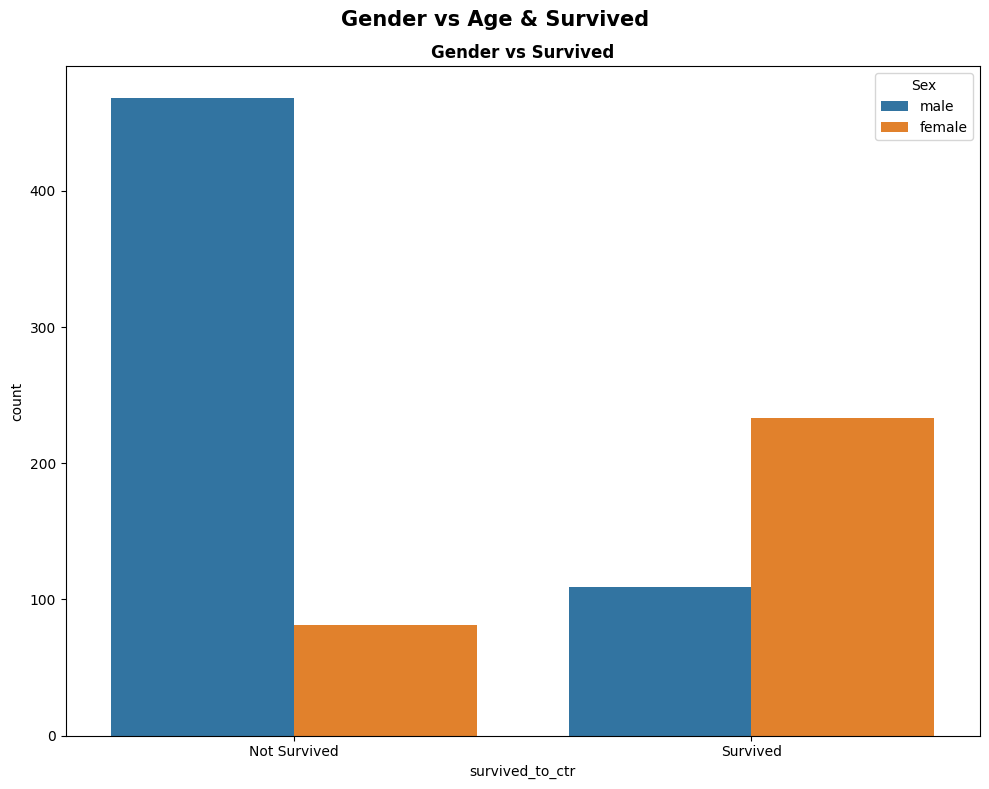

In [55]:
# visualize data using plt.subplot()
plt.figure(figsize=(10,8))
plt.suptitle('Gender vs Age & Survived', fontweight='bold', fontsize=15)

# gender vs Survived
plt.subplot(111)
sns.countplot(data=df_visual, x='survived_to_ctr', hue='Sex')
plt.title('Gender vs Survived', fontweight='bold')

# gender vs Age
#plt.subplot(232)
#sns.countplot(data=df, x='Sex', hue='Sex', order=df['Sex'].sort_values().unique())
#plt.title('Gender vs Age', fontweight='bold')

plt.tight_layout()
plt.show()
